# Analyse von Eigenschaften automatischer ausgewählter Tracks von isolierten konvektiven Zellen

### Stephan Lenk, 09.10.2019

# 1 Einleitung und Zielsetzung

- SATCAST-Algorithmus funktioniert theoretisch hat aber hohe FAR 
- Vorhersagezeit gegenüber Radar relativ kurz
- Idee: Untersuchung vieler Fälle (1&thinsp;a, 10&thinsp;a?) um Schwellwertsätze für verschiedene Fallkategorieren abzuleiten
- Ziele: 
    1. Unterschiede zwischen Fällen besser verstehen
    2. Bewertung bei wievielen Fällen der Satellit einen sinnvollen Beitrag zur CI-Erkennung liefert
    3. Verbesserung der Vorhersage

# 2 Fallauswahl

- basierend auf RADOLAN-RX (Haberlie-Ansatz)
- CI-Zeitpunkt := Zeitpunkt mit erstem Mal Z&thinsp;&geq;&thinsp;35&thinsp;dBZ
- Mindestlebenszeit = 30&thinsp;min
- Erzeugung für 2008 bis 2017 (273&thinsp;169 Fälle)
- weitere Filterung:
    - maximale Ausgangsfläche: 100&thinsp;px<sup>2</sup> &rarr; Vermeidung von stratiformen und frontalen Objekten
    - minimale Flächenzunahme über Zeit: 200&thinsp;px<sup>2</sup> &rarr; Vermeidung von nichtmeteorlogischen Objekten
    - Mindestverhältnis von 20&thinsp;dBZ- zu 30&thinsp;dBZ-Fläche von 0,3 &rarr; Vermeidung von größerflächigen Niederschlagsgebieten mit eingelagerten Bereichen mit stärkerem Niederschlag
- nach Filterung noch 8341 Fälle

# 3 Satellitenbasierte Einteilung der ausgewählten Fälle 

- Einteilung der verbliebenen Fälle um später die Eigenschaften zu untersuchen
- mögliche Einteilungsgrundlagen:
    1. Bedeckungsgrad (Hypothese: bei isolierten Fällen, sollte er eher niedrig sein)
    2. Großwetterlage (Hypothese: bei einigen Wetterlagen sollten isolierte Gewitter häufiger sein)
    3. mittlere Wolkenhöhe (Hypothese: da wir den Ausschnitt zum CI-Zeitpunkt betrachten, sollte sie nicht zu hoch sein. Wenn sie hoch ist, sind wahrscheinlich hohe Wolken mit im Spiel.)
    4. dominanter Wolkentyp (Hypothese: bei isolierten Fällen, sollten wolkenfreie Bereiche dominieren)
    5. Grauwertkorrelationsmatrixeigenschaften (Hypothese: isolierte Fälle sollten einen hohen Kontrast haben un wenig geordnet sein.),
    6. Anteile von niedrigen, mittleren und hohen Wolken (Hypothese: zum CI-Zeipunkt sollte der Anteil hoher Wolken eher gering sein. Wenn er hoch ist, sind warscheinlich hohe Eiswolken mit im Ausschnitt.)
    7. nach Entstehungstyp

# 4 Erste manuelle Einteilung

- nur für Fälle des Jahres 2013 (669 Fälle)
- Erzeugung NC-Komposit für 51&thinsp;px&thinsp;&times;&thinsp;51&thinsp;px - Ausschnitt um Radarobjektschwerpunkt zum CI-Zeitpunkt
- Einteilung in folgende Klassen

|      Klasse     | Klassennummer |               Erläuterung                  |           Satellitenindikation          |
|:---------------:|:-------------:|:------------------------------------------:|:---------------------------------------:|
|    isoliert     |       1       |     islolierte konvektive Auslösung        |              gut möglich                |
| im Wolkenfeld   |       2       | Auslösung in einem lockeren Wolkenfeld     |      möglich, abhängig von Struktur     |
|  unter Wolken   |       3       |      Auslösung unter hohen Wolken          |             nicht möglich               |
| Randentwicklung |       4       | neue Entwicklung am Rand einer bestehenden |           möglich                  |
|     nichts      |       0       | keine Entwicklung sichtbar                 |                 keine                   

![Fallklassenbeispiele](bilder/Fallklassen.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from os import listdir
from numpy import zeros
from numpy import asarray
from numpy import savez_compressed

import xarray as xr

from skimage.feature import greycomatrix, greycoprops

from glob import glob
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import pickle

import sys
sys.path.append("/vols/satellite/lenk/utils")
import nwcsaf_ct_cmap
ct_cmap, ct_norm, ct_abbrev = nwcsaf_ct_cmap.nwcsaf_ct_cmap()
import load_satellite_data as lsd
import fixed_colourbar as fc

from plotting_tools.colormaps import enhanced_colormap
emap = enhanced_colormap(vmin=210)

import MSGtools as mst
from analysis_tools import grid_and_interpolation as gi

from standard_config import *
from skimage.feature import greycomatrix, greycoprops

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
haci_data = pd.read_csv("/vols/satellite/home/lenk/data/HACI_bbox_data/haci_objects.dat",delimiter=r"\s+")

In [3]:
haci_data_filtered = pd.read_csv("/vols/satellite/home/lenk/data/HACI_bbox_data/haci_objects_filtered.csv")

In [4]:
len(haci_data[haci_data.t1 - haci_data.t0 >= 6].index)

273169

In [5]:
len(haci_data_filtered.index)

8341

In [6]:
haci_cases_classified = pd.read_csv("{}/2019-01_trackingstudie/HACI_cases_manually_classified.csv".format(proj_path))

In [7]:
haci_cases_classified.columns

Index(['case_id', 'Klasse'], dtype='object')

In [8]:
haci_cases_classified.head()

,case_id,Klasse
0,20130318_634,3
1,20130412_1661,2
2,20130412_1683,2
3,20130416_1277,2
4,20130418_924,2


In [10]:
class_fractions = haci_cases_classified.Klasse.value_counts(normalize=True)*100

In [12]:
haci_cases_classified.Klasse.value_counts().sum()

405

In [11]:
class_fractions.head()

2    59.753086
3    34.074074
4     5.432099
1     0.740741
Name: Klasse, dtype: float64

In [12]:
 len(haci_cases_classified.index)

405

## Ergebnis der Klassifikation

- basierend auf NC-Komposit &rarr; nur Fälle am Tag (405 Fälle)
- isolierte Fälle: {{print("{:.1f}%".format(class_fractions.loc[1]))}}
- Fälle im Wolkenfeld: {{print("{:.1f}%".format(class_fractions.loc[2]))}}
- Enwicklungen unter Wolken: {{print("{:.1f}%".format(class_fractions.loc[3]))}} 
- Entwicklungen am Rand von bestehender Konvektion: {{print("{:.1f}%".format(class_fractions.loc[4]))}}
- mit geeigneter Segmentierung wahrscheinlich isolierte Fälle, Fälle im Wolkenfeld und Randentwicklungen möglich mit Satellit zu erkennen (65.9% der Fälle)

# 5 Feldeigenschaften zum CI-Zeitpunkt

- Bedeckungsgrad
- Anteil an sehr niedrigen, niedrigen, mittelhohen, hohen und sehr hohen Wolken
- mittlere Wolkenhöhe
- Eigeschaften der Grauwertkookurrenzmatrix (1-Pixel-Nachbarschaft, horizontal unf vertikal gemittelt) des Ausschnitts: Homogenität, Zweites Winkelmoment (ASM), Korrelation

In [108]:
cloud_types = pd.read_csv("/vols/satellite/home/lenk/utils/nwcsaf_cloud_types2.list",sep=",")
case_properties_t0 = pd.read_csv("/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/case_properties.csv")
gwl_data = pd.read_csv("/vols/satellite/home/lenk/data/auxillary_data/GWL.csv")

In [15]:
def boxplot_sorted(df, by, column,**kwargs):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()
    df2[meds.index].boxplot(rot=90)

In [109]:
mapping = {0:'nichts',1:'isoliert', 2:'Wolkenfeld',3:'u. Wolken',4:'Rand.'}

In [110]:
case_properties_t0 = case_properties_t0.replace({'class': mapping, 'Klasse': mapping})

In [111]:
case_properties_t0.head()

,case_id,cloud_cover,cloud_fraction_very_low,cloud_fraction_low,cloud_fraction_medium,cloud_fraction_high,cloud_fraction_very_high,homogeneity,asm,correlation,class,cloud_height
0,20130318_634,1.000000,0.000000,0.000000,0.000000,0.891429,0.108571,0.524035,0.012546,0.936306,u. Wolken,7928.000000
1,20130412_1661,0.980408,0.281633,0.168163,0.198367,0.140408,0.139592,0.564569,0.015887,0.945871,Wolkenfeld,3953.643555
2,20130412_1683,0.986939,0.090612,0.120000,0.150204,0.150204,0.372245,0.384202,0.006392,0.871802,Wolkenfeld,5529.390137
3,20130416_1277,0.983673,0.066939,0.103673,0.102041,0.068571,0.515918,0.527150,0.013649,0.939994,Wolkenfeld,7207.047852
4,20130418_924,0.758367,0.193469,0.149388,0.031837,0.000000,0.164898,0.496935,0.020784,0.899443,Wolkenfeld,3887.140625


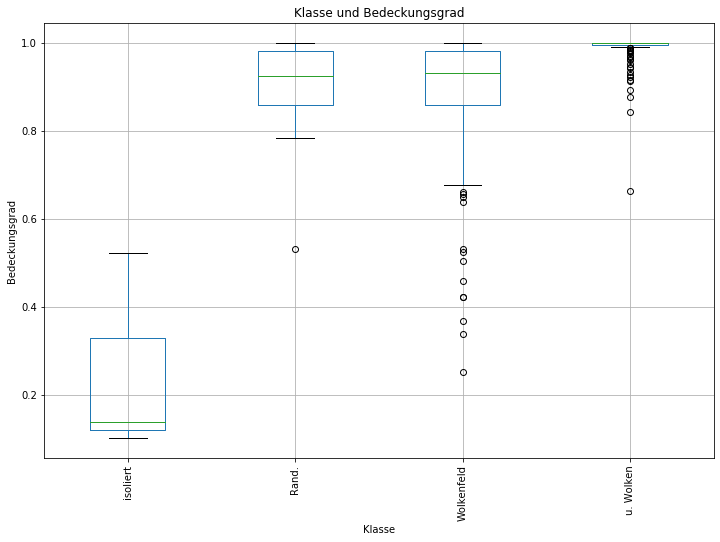

In [112]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
boxplot_sorted(case_properties_t0,'class','cloud_cover',ax=ax)
ax.set_xlabel("Klasse")
ax.set_ylabel("Bedeckungsgrad")
ax.set_title("Klasse und Bedeckungsgrad")
plt.savefig("bilder/klasse_bedeckungsgrad.png")

![GLCM-ASM](bilder/klasse_bedeckungsgrad.png)

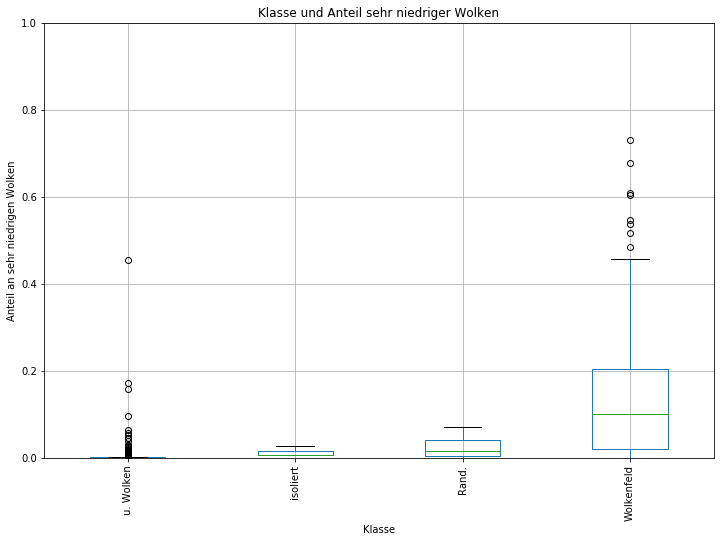

In [113]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
boxplot_sorted(case_properties_t0,'class','cloud_fraction_very_low',ax=ax)
ax.set_xlabel("Klasse")
ax.set_ylabel("Anteil an sehr niedrigen Wolken")
ax.set_title("Klasse und Anteil sehr niedriger Wolken")
ax.set_ylim(0,1)
plt.savefig("bilder/klasse_sn_wolken.png")

![GLCM-ASM](bilder/klasse_sn_wolken.png)

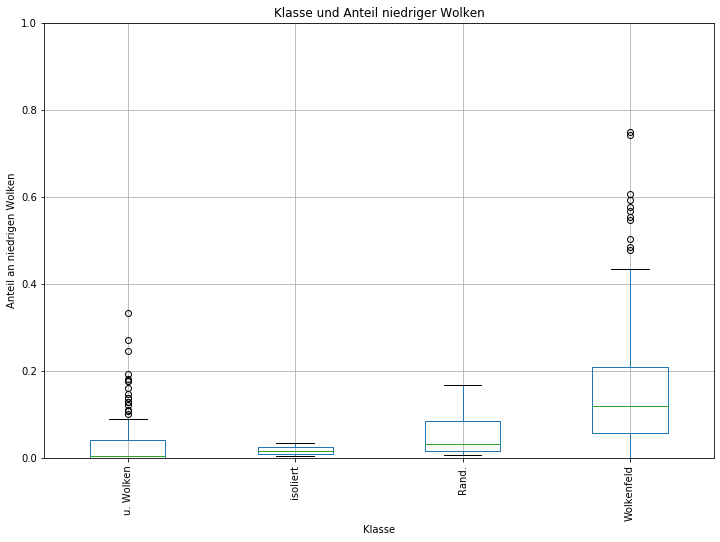

In [114]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
boxplot_sorted(case_properties_t0,'class','cloud_fraction_low',ax=ax)
ax.set_xlabel("Klasse")
ax.set_ylabel("Anteil an niedrigen Wolken")
ax.set_title("Klasse und Anteil niedriger Wolken")
ax.set_ylim(0,1)
plt.savefig("bilder/klasse_n_wolken.png")

![GLCM-ASM](bilder/klasse_n_wolken.png)

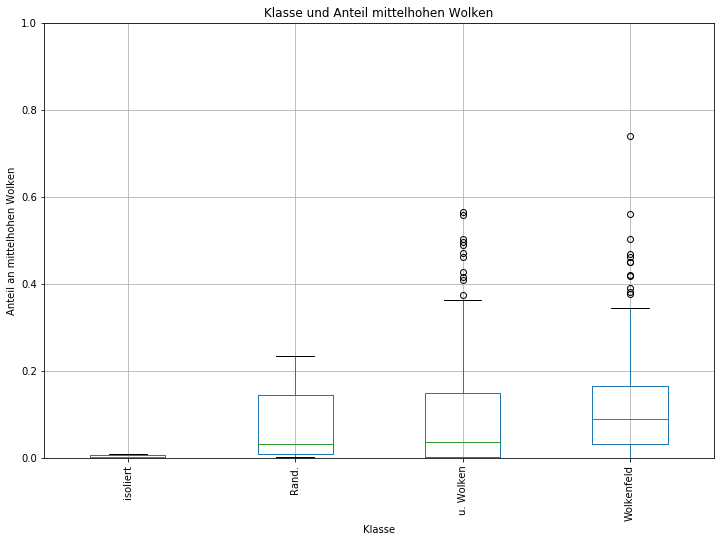

In [115]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
boxplot_sorted(case_properties_t0,'class','cloud_fraction_medium',ax=ax)
ax.set_xlabel("Klasse")
ax.set_ylabel("Anteil an mittelhohen Wolken")
ax.set_title("Klasse und Anteil mittelhohen Wolken")
ax.set_ylim(0,1)
plt.savefig("bilder/klasse_m_wolken.png")

![GLCM-ASM](bilder/klasse_m_wolken.png)

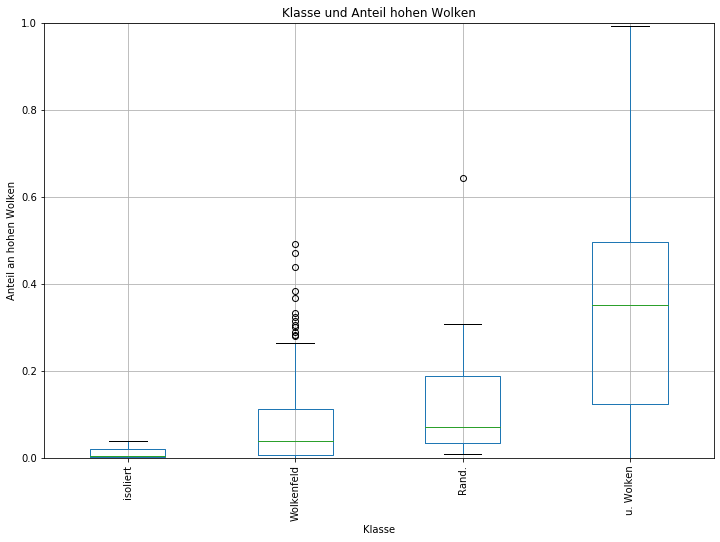

In [116]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
boxplot_sorted(case_properties_t0,'class','cloud_fraction_high',ax=ax)
ax.set_xlabel("Klasse")
ax.set_ylabel("Anteil an hohen Wolken")
ax.set_title("Klasse und Anteil hohen Wolken")
ax.set_ylim(0,1)
plt.savefig("bilder/klasse_h_wolken.png")

![GLCM-ASM](bilder/klasse_h_wolken.png)

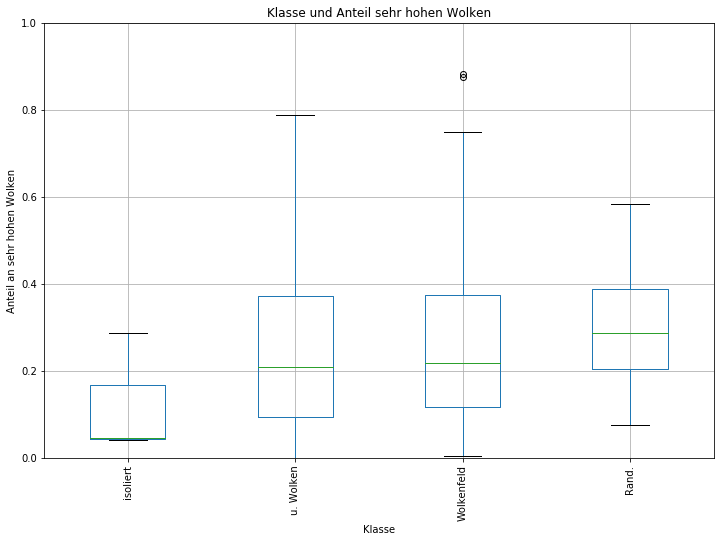

In [117]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
boxplot_sorted(case_properties_t0,'class','cloud_fraction_very_high',ax=ax)
ax.set_xlabel("Klasse")
ax.set_ylabel("Anteil an sehr hohen Wolken")
ax.set_title("Klasse und Anteil sehr hohen Wolken")
ax.set_ylim(0,1)
plt.savefig("bilder/klasse_sh_wolken.png")

![GLCM-ASM](bilder/klasse_sh_wolken.png)

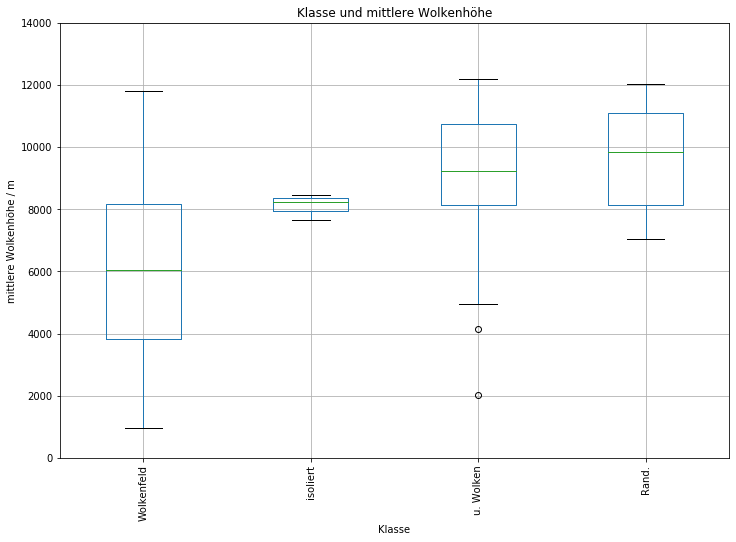

In [118]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
boxplot_sorted(case_properties_t0,'class','cloud_height',ax=ax)
ax.set_xlabel("Klasse")
ax.set_ylabel("mittlere Wolkenhöhe / m")
ax.set_title("Klasse und mittlere Wolkenhöhe")
ax.set_ylim(0,14000)
plt.savefig("bilder/klasse_wolkenhöhe.png")

![Wokenhöhe](bilder/klasse_wolkenhöhe.png)

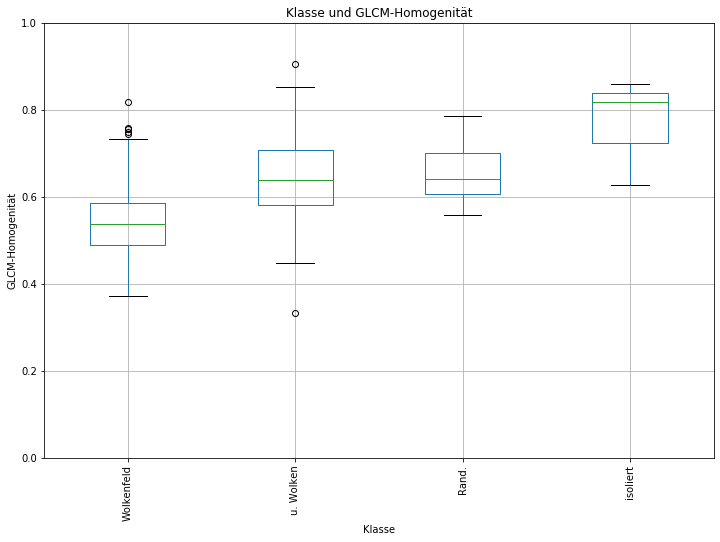

In [119]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
boxplot_sorted(case_properties_t0,'class','homogeneity',ax=ax)
ax.set_xlabel("Klasse")
ax.set_ylabel("GLCM-Homogenität")
ax.set_title("Klasse und GLCM-Homogenität")
ax.set_ylim(0,1)
plt.savefig("bilder/klasse_homogenität.png")

![GLCM-Homogenität](bilder/klasse_homogenität.png)

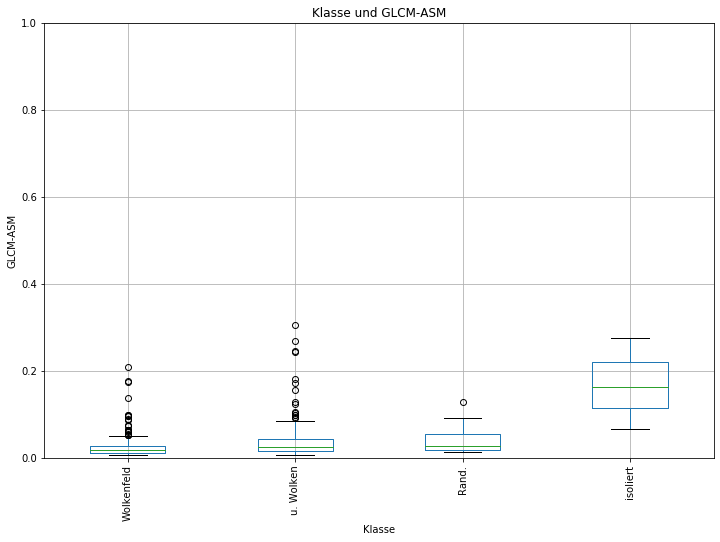

In [120]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
boxplot_sorted(case_properties_t0,'class','asm',ax=ax)
ax.set_xlabel("Klasse")
ax.set_ylabel("GLCM-ASM")
ax.set_title("Klasse und GLCM-ASM")
ax.set_ylim(0,1)
plt.savefig("bilder/klasse_asm.png")

![GLCM-ASM](bilder/klasse_asm.png)

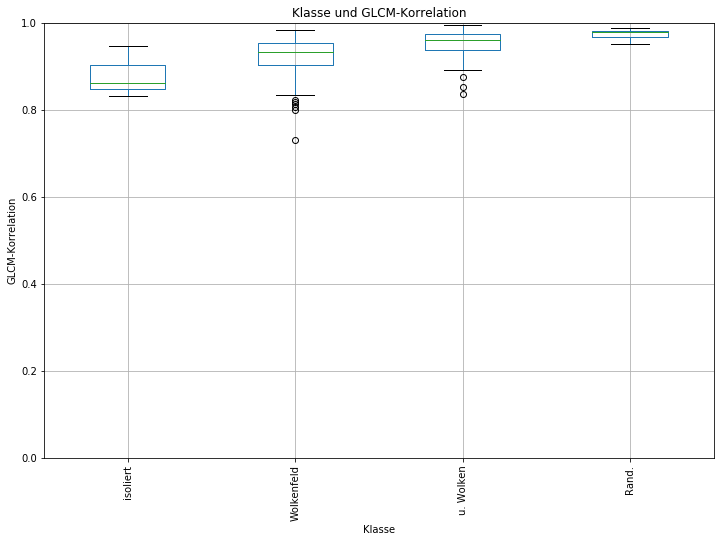

In [121]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
boxplot_sorted(case_properties_t0,'class','correlation',ax=ax)
ax.set_xlabel("Klasse")
ax.set_ylabel("GLCM-Korrelation")
ax.set_title("Klasse und GLCM-Korrelation")
ax.set_ylim(0,1)
plt.savefig("bilder/klasse_korrelation.png")

![GLCM_Korrelation](bilder/klasse_korrelation.png)

- mögliche Definion für isolierte Fälle:
    - Bedeckungsgrad&thinsp;&leq;0,5
    (Homogenität&thinsp;>&thinsp;0,8)
    
- Definition mit Bedeckungsgrad ergibt 261 isolierte Fälle für 2008 bis 2017
- Definition mit Bedeckungsgrad und Homogenität ergibt 6 Fälle für 2008 bis 2017

In [52]:
def derive_cloud_cover(cma_data):
    cloudiness = len(np.where(cma_data >= 2)[0]) / (cma_data.shape[0]*cma_data.shape[1])
    
    return cloudiness

def determine_cloud_fractions(ct_data):
    n_pixels = ct_data.shape[0] * ct_data.shape[1]
    
    # very low
    n_very_low = len(np.where(ct_data==6)[0])
                     
    # low
    n_low = len(np.where(ct_data==8)[0])
    
    # medium
    n_medium = len(np.where(ct_data==10)[0])
    
    # high
    n_high = len(np.where(ct_data==12)[0])
    
    #very_high
    n_very_high = len(np.where(np.logical_and(ct_data>=15,ct_data<19))[0])
                      
    out_dict = {'very_low':n_very_low/n_pixels,
                'low':n_low/n_pixels,
                'medium':n_medium/n_pixels,
                'high':n_high/n_pixels,
                'very_high':n_very_high/n_pixels
               }
    return out_dict   

def scale_array_min_max(array_data,range_min=0,range_max=1):
    """
    Scales a array into the chosen range.
    
    Inputs:
    -------
    array_data: numpy array of floats or integers, 2d
        array to scale
    range_min: int or float, default = 0
        minimum value of the range to scale array to,
    range_max: int or float, default = 1
        maximum value of the range to scale array to,
        
    Returns:
    --------
    scaled_array: numpy array of floats, 2d
    """
    # get array extrema
    array_min = np.min(array_data)
    array_max = np.max(array_data)

    # derive conversion parameters
    a = (range_max - range_min) / (array_max - array_min)
    b = range_max - a * array_max

    # scale array
    scaled_array = a * array_data + b
    
    return scaled_array

def load_needed_nwcsaf_data(time, row, col, box_size=35):
    ctth = mst.get_nwcsaf_prod('CTTH_HEIGHT',t,calibrate=True)
    ct = mst.get_nwcsaf_prod('CT',t,calibrate=True)
    cma = mst.get_nwcsaf_prod('CMa',t,calibrate=True)
    
    out = {'ctth': cutout_box(ctth, row, col, box_size),
           'ct': cutout_box(ct, row, col, box_size),
           'cma': cutout_box(cma, row, col, box_size)}
    
    return out

In [96]:
case_path = "/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/"

case_ids = []
isolated = []

for i,case in haci_data_filtered.iterrows():
    try:
        case_id = "{}_{}".format(pd.Timestamp(case.date).strftime("%Y%m%d"),case.id)
        print(case_id)
        case_data = xr.open_dataset("{}/{}.nc".format(case_path,case_id))
        cloud_cover = derive_cloud_cover(case_data.CMa.data[1])
        #ir108_gray = np.uint8(scale_array_min_max(np.max(case_data.IR_108.data[1])-case_data.IR_108.data[1],0,24))
        #glcm = greycomatrix(ir108_gray, [1], [0, np.pi/2],symmetric=True,normed=True)
        #glcm_homogeneity = np.mean(greycoprops(glcm,'homogeneity'))
        
        if cloud_cover <= 0.5:# and glcm_homogeneity > 0.8:
            isolated.append(1)
        else:
            isolated.append(0)
            
        case_ids.append(case_id)
    except Exception as e:
        print("Fehler {} bei Fall {}.".format(e,case_id))
        continue

20080107_1370
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080107_1370.nc' bei Fall 20080107_1370.
20080117_969
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080117_969.nc' bei Fall 20080117_969.
20080122_672
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080122_672.nc' bei Fall 20080122_672.
20080206_734
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080206_734.nc' bei Fall 20080206_734.
20080206_2457
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080206_2457.nc' bei Fall 20080206_2457.
20080301_1938
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080301_1938.nc' b

20080529_2372
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080529_2372.nc' bei Fall 20080529_2372.
20080530_748
20080530_1321
20080530_1323
20080530_1343
20080530_1638
20080530_1649
20080530_1662
20080530_1771
20080530_1980
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080530_1980.nc' bei Fall 20080530_1980.
20080530_2113
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080530_2113.nc' bei Fall 20080530_2113.
20080530_2147
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080530_2147.nc' bei Fall 20080530_2147.
20080530_2177
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080530_2177.nc' bei Fall 20080530_2177.
20080530_2201
Fehler [Errno 2

20080622_1313
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080622_1313.nc' bei Fall 20080622_1313.
20080622_1319
20080622_1324
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080622_1324.nc' bei Fall 20080622_1324.
20080622_1340
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080622_1340.nc' bei Fall 20080622_1340.
20080622_1361
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080622_1361.nc' bei Fall 20080622_1361.
20080622_1379
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080622_1379.nc' bei Fall 20080622_1379.
20080622_1382
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

20080707_1504
20080707_1521
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080707_1521.nc' bei Fall 20080707_1521.
20080707_1723
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080707_1723.nc' bei Fall 20080707_1723.
20080707_1924
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080707_1924.nc' bei Fall 20080707_1924.
20080707_1998
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080707_1998.nc' bei Fall 20080707_1998.
20080707_2156
20080707_2310
20080707_2413
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080707_2413.nc' bei Fall 20080707_2413.
20080707_2601
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01

20080719_2772
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080719_2772.nc' bei Fall 20080719_2772.
20080719_2856
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080719_2856.nc' bei Fall 20080719_2856.
20080719_2865
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080719_2865.nc' bei Fall 20080719_2865.
20080719_2996
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080719_2996.nc' bei Fall 20080719_2996.
20080719_3042
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080719_3042.nc' bei Fall 20080719_3042.
20080719_3093
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080719_3

20080731_2382
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080731_2382.nc' bei Fall 20080731_2382.
20080731_2404
20080801_302
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080801_302.nc' bei Fall 20080801_302.
20080801_543
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080801_543.nc' bei Fall 20080801_543.
20080801_565
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080801_565.nc' bei Fall 20080801_565.
20080801_570
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080801_570.nc' bei Fall 20080801_570.
20080801_936
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080801_

20080808_2787
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080808_2787.nc' bei Fall 20080808_2787.
20080808_2992
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080808_2992.nc' bei Fall 20080808_2992.
20080808_3206
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080808_3206.nc' bei Fall 20080808_3206.
20080808_3360
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080808_3360.nc' bei Fall 20080808_3360.
20080810_2476
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080810_2476.nc' bei Fall 20080810_2476.
20080811_1416
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20080811_1

20090509_1635
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090509_1635.nc' bei Fall 20090509_1635.
20090509_1882
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090509_1882.nc' bei Fall 20090509_1882.
20090511_262
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090511_262.nc' bei Fall 20090511_262.
20090511_1575
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090511_1575.nc' bei Fall 20090511_1575.
20090511_1784
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090511_1784.nc' bei Fall 20090511_1784.
20090511_2383
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090511_2383

20090522_1864
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090522_1864.nc' bei Fall 20090522_1864.
20090522_1922
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090522_1922.nc' bei Fall 20090522_1922.
20090522_1978
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090522_1978.nc' bei Fall 20090522_1978.
20090522_2404
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090522_2404.nc' bei Fall 20090522_2404.
20090524_2291
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090524_2291.nc' bei Fall 20090524_2291.
20090525_942
20090525_981
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t

20090607_1209
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090607_1209.nc' bei Fall 20090607_1209.
20090607_1569
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090607_1569.nc' bei Fall 20090607_1569.
20090609_907
20090609_924
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090609_924.nc' bei Fall 20090609_924.
20090609_1004
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090609_1004.nc' bei Fall 20090609_1004.
20090609_1108
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090609_1108.nc' bei Fall 20090609_1108.
20090609_1154
20090609_1264
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/da

20090703_1608
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090703_1608.nc' bei Fall 20090703_1608.
20090703_1652
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090703_1652.nc' bei Fall 20090703_1652.
20090703_1683
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090703_1683.nc' bei Fall 20090703_1683.
20090703_1772
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090703_1772.nc' bei Fall 20090703_1772.
20090703_1964
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090703_1964.nc' bei Fall 20090703_1964.
20090703_2017
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090703_2

20090710_152
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090710_152.nc' bei Fall 20090710_152.
20090710_1622
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090710_1622.nc' bei Fall 20090710_1622.
20090710_2166
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090710_2166.nc' bei Fall 20090710_2166.
20090710_2811
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090710_2811.nc' bei Fall 20090710_2811.
20090711_1179
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090711_1179.nc' bei Fall 20090711_1179.
20090713_1892
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090713_1892

20090720_2709
20090720_2826
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090720_2826.nc' bei Fall 20090720_2826.
20090721_1670
20090721_1720
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090721_1720.nc' bei Fall 20090721_1720.
20090721_2353
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090721_2353.nc' bei Fall 20090721_2353.
20090721_2509
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090721_2509.nc' bei Fall 20090721_2509.
20090721_2520
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090721_2520.nc' bei Fall 20090721_2520.
20090721_2643
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudi

20090724_1944
20090724_1986
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090724_1986.nc' bei Fall 20090724_1986.
20090724_2058
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090724_2058.nc' bei Fall 20090724_2058.
20090724_2125
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090724_2125.nc' bei Fall 20090724_2125.
20090724_2305
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090724_2305.nc' bei Fall 20090724_2305.
20090724_2329
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090724_2329.nc' bei Fall 20090724_2329.
20090724_2373
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

20090810_1877
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090810_1877.nc' bei Fall 20090810_1877.
20090810_1882
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090810_1882.nc' bei Fall 20090810_1882.
20090810_1989
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090810_1989.nc' bei Fall 20090810_1989.
20090810_2081
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090810_2081.nc' bei Fall 20090810_2081.
20090810_2215
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090810_2215.nc' bei Fall 20090810_2215.
20090810_2307
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090810_2

20090905_2048
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090905_2048.nc' bei Fall 20090905_2048.
20090913_1587
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090913_1587.nc' bei Fall 20090913_1587.
20090913_1619
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090913_1619.nc' bei Fall 20090913_1619.
20090913_1727
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090913_1727.nc' bei Fall 20090913_1727.
20090914_408
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090914_408.nc' bei Fall 20090914_408.
20090914_1924
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20090914_1924

20100703_2667
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100703_2667.nc' bei Fall 20100703_2667.
20100703_2679
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100703_2679.nc' bei Fall 20100703_2679.
20100703_2744
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100703_2744.nc' bei Fall 20100703_2744.
20100703_2984
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100703_2984.nc' bei Fall 20100703_2984.
20100703_3048
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100703_3048.nc' bei Fall 20100703_3048.
20100703_3051
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100703_3

20100712_243
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100712_243.nc' bei Fall 20100712_243.
20100712_262
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100712_262.nc' bei Fall 20100712_262.
20100712_359
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100712_359.nc' bei Fall 20100712_359.
20100712_1750
20100712_1887
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100712_1887.nc' bei Fall 20100712_1887.
20100712_1956
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100712_1956.nc' bei Fall 20100712_1956.
20100712_2143
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100

20100714_3006
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100714_3006.nc' bei Fall 20100714_3006.
20100714_3234
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100714_3234.nc' bei Fall 20100714_3234.
20100714_3477
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100714_3477.nc' bei Fall 20100714_3477.
20100714_3496
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100714_3496.nc' bei Fall 20100714_3496.
20100714_3570
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100714_3570.nc' bei Fall 20100714_3570.
20100714_3577
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100714_3

20100808_3827
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100808_3827.nc' bei Fall 20100808_3827.
20100808_3887
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100808_3887.nc' bei Fall 20100808_3887.
20100808_4151
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100808_4151.nc' bei Fall 20100808_4151.
20100808_4282
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100808_4282.nc' bei Fall 20100808_4282.
20100810_3210
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100810_3210.nc' bei Fall 20100810_3210.
20100811_3586
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100811_3

20100828_4083
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100828_4083.nc' bei Fall 20100828_4083.
20100828_4175
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100828_4175.nc' bei Fall 20100828_4175.
20100828_4231
20100829_3970
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100829_3970.nc' bei Fall 20100829_3970.
20100830_3478
20100830_3511
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100830_3511.nc' bei Fall 20100830_3511.
20100830_3972
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20100830_3972.nc' bei Fall 20100830_3972.
20100831_2389
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudi

20110429_1938
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110429_1938.nc' bei Fall 20110429_1938.
20110429_2287
20110429_2452
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110429_2452.nc' bei Fall 20110429_2452.
20110430_1734
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110430_1734.nc' bei Fall 20110430_1734.
20110430_2151
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110430_2151.nc' bei Fall 20110430_2151.
20110430_2496
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110430_2496.nc' bei Fall 20110430_2496.
20110510_3206
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110522_3067.nc' bei Fall 20110522_3067.
20110522_3087
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110522_3087.nc' bei Fall 20110522_3087.
20110522_3115
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110522_3115.nc' bei Fall 20110522_3115.
20110522_3141
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110522_3141.nc' bei Fall 20110522_3141.
20110522_3190
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110522_3190.nc' bei Fall 20110522_3190.
20110522_3291
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110522_3291.nc' bei Fa

20110606_1588
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110606_1588.nc' bei Fall 20110606_1588.
20110606_1595
20110606_1860
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110606_1860.nc' bei Fall 20110606_1860.
20110606_1870
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110606_1870.nc' bei Fall 20110606_1870.
20110606_1997
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110606_1997.nc' bei Fall 20110606_1997.
20110606_2017
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110606_2017.nc' bei Fall 20110606_2017.
20110606_2061
20110606_2072
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudi

20110621_2172
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110621_2172.nc' bei Fall 20110621_2172.
20110621_2635
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110621_2635.nc' bei Fall 20110621_2635.
20110621_2935
20110621_3403
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110621_3403.nc' bei Fall 20110621_3403.
20110622_461
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110622_461.nc' bei Fall 20110622_461.
20110622_948
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110622_948.nc' bei Fall 20110622_948.
20110622_1769
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20

20110706_2278
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110706_2278.nc' bei Fall 20110706_2278.
20110706_2348
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110706_2348.nc' bei Fall 20110706_2348.
20110706_2594
20110706_2597
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110706_2597.nc' bei Fall 20110706_2597.
20110706_2846
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110706_2846.nc' bei Fall 20110706_2846.
20110706_3008
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110706_3008.nc' bei Fall 20110706_3008.
20110706_3206
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

20110718_3841
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110718_3841.nc' bei Fall 20110718_3841.
20110719_3111
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110719_3111.nc' bei Fall 20110719_3111.
20110719_3177
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110719_3177.nc' bei Fall 20110719_3177.
20110720_355
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110720_355.nc' bei Fall 20110720_355.
20110720_539
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110720_539.nc' bei Fall 20110720_539.
20110721_3235
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110721_3235.nc

20110814_3293
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110814_3293.nc' bei Fall 20110814_3293.
20110815_2158
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110815_2158.nc' bei Fall 20110815_2158.
20110815_2787
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110815_2787.nc' bei Fall 20110815_2787.
20110818_2901
20110818_3205
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110818_3205.nc' bei Fall 20110818_3205.
20110818_3209
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110818_3209.nc' bei Fall 20110818_3209.
20110818_3254
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

20110824_2668
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110824_2668.nc' bei Fall 20110824_2668.
20110824_2845
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110824_2845.nc' bei Fall 20110824_2845.
20110824_2921
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110824_2921.nc' bei Fall 20110824_2921.
20110824_2927
20110824_2943
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110824_2943.nc' bei Fall 20110824_2943.
20110824_3132
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20110824_3132.nc' bei Fall 20110824_3132.
20110824_3169
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

20120422_1175
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120422_1175.nc' bei Fall 20120422_1175.
20120422_2410
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120422_2410.nc' bei Fall 20120422_2410.
20120422_4001
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120422_4001.nc' bei Fall 20120422_4001.
20120423_1560
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120423_1560.nc' bei Fall 20120423_1560.
20120423_1684
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120423_1684.nc' bei Fall 20120423_1684.
20120501_2031
20120501_2154
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

20120520_3790
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120520_3790.nc' bei Fall 20120520_3790.
20120520_4090
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120520_4090.nc' bei Fall 20120520_4090.
20120520_4150
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120520_4150.nc' bei Fall 20120520_4150.
20120520_4293
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120520_4293.nc' bei Fall 20120520_4293.
20120520_4582
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120520_4582.nc' bei Fall 20120520_4582.
20120520_4684
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120520_4

20120608_3478
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120608_3478.nc' bei Fall 20120608_3478.
20120608_3640
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120608_3640.nc' bei Fall 20120608_3640.
20120608_3678
20120608_3809
20120608_3865
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120608_3865.nc' bei Fall 20120608_3865.
20120608_3896
20120608_4114
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120608_4114.nc' bei Fall 20120608_4114.
20120608_4139
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120608_4139.nc' bei Fall 20120608_4139.
20120608_4340
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01

20120701_3871
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120701_3871.nc' bei Fall 20120701_3871.
20120701_4032
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120701_4032.nc' bei Fall 20120701_4032.
20120702_3142
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120702_3142.nc' bei Fall 20120702_3142.
20120702_4222
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120702_4222.nc' bei Fall 20120702_4222.
20120703_2506
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120703_2506.nc' bei Fall 20120703_2506.
20120704_2164
20120704_2748
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

20120707_2465
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120707_2465.nc' bei Fall 20120707_2465.
20120707_2482
20120707_2493
20120707_2513
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120707_2513.nc' bei Fall 20120707_2513.
20120707_2731
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120707_2731.nc' bei Fall 20120707_2731.
20120707_2925
20120707_3072
20120707_3217
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120707_3217.nc' bei Fall 20120707_3217.
20120707_3257
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120707_3257.nc' bei Fall 20120707_3257.
20120707_3291
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/len

20120714_3463
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120714_3463.nc' bei Fall 20120714_3463.
20120714_3528
20120714_3532
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120714_3532.nc' bei Fall 20120714_3532.
20120714_3731
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120714_3731.nc' bei Fall 20120714_3731.
20120714_3966
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120714_3966.nc' bei Fall 20120714_3966.
20120714_3969
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120714_3969.nc' bei Fall 20120714_3969.
20120714_4018
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

20120727_3698
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120727_3698.nc' bei Fall 20120727_3698.
20120727_3832
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120727_3832.nc' bei Fall 20120727_3832.
20120727_3924
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120727_3924.nc' bei Fall 20120727_3924.
20120727_3982
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120727_3982.nc' bei Fall 20120727_3982.
20120727_4002
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120727_4002.nc' bei Fall 20120727_4002.
20120727_4140
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120727_4

20120802_2500
20120802_2603
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120802_2603.nc' bei Fall 20120802_2603.
20120802_2642
20120802_2647
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120802_2647.nc' bei Fall 20120802_2647.
20120802_2653
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120802_2653.nc' bei Fall 20120802_2653.
20120802_2669
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120802_2669.nc' bei Fall 20120802_2669.
20120802_2792
20120802_2905
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120802_2905.nc' bei Fall 20120802_2905.
20120802_2972
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01

20120825_2436
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120825_2436.nc' bei Fall 20120825_2436.
20120825_2702
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120825_2702.nc' bei Fall 20120825_2702.
20120825_2794
20120825_2826
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120825_2826.nc' bei Fall 20120825_2826.
20120825_2851
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120825_2851.nc' bei Fall 20120825_2851.
20120825_2940
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120825_2940.nc' bei Fall 20120825_2940.
20120825_2958
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

20120911_2870
20120911_2895
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120911_2895.nc' bei Fall 20120911_2895.
20120911_2937
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120911_2937.nc' bei Fall 20120911_2937.
20120911_2986
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120911_2986.nc' bei Fall 20120911_2986.
20120911_3009
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120911_3009.nc' bei Fall 20120911_3009.
20120911_3120
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20120911_3120.nc' bei Fall 20120911_3120.
20120911_3207
20120911_3219
20120911_3222
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01

20130503_1342
20130504_1485
20130504_1766
20130506_1651
20130506_1750
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130506_1750.nc' bei Fall 20130506_1750.
20130506_1779
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130506_1779.nc' bei Fall 20130506_1779.
20130506_2364
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130506_2364.nc' bei Fall 20130506_2364.
20130507_1026
20130507_1711
20130507_1796
20130507_2060
20130507_2350
20130507_2482
20130507_2515
20130507_2532
20130507_2596
20130507_2662
20130507_2680
20130507_2745
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130507_2745.nc' bei Fall 20130507_2745.
20130507_2914
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_tra

20130617_1636
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130617_1636.nc' bei Fall 20130617_1636.
20130618_263
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130618_263.nc' bei Fall 20130618_263.
20130618_1849
20130618_1985
20130619_135
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130619_135.nc' bei Fall 20130619_135.
20130619_274
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130619_274.nc' bei Fall 20130619_274.
20130619_311
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130619_311.nc' bei Fall 20130619_311.
20130619_312
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutout

20130723_1001
20130723_1053
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130723_1053.nc' bei Fall 20130723_1053.
20130723_1148
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130723_1148.nc' bei Fall 20130723_1148.
20130724_602
20130724_604
20130724_651
20130724_662
20130724_724
20130724_738
20130724_739
20130724_832
20130724_853
20130724_858
20130724_950
20130724_1013
20130724_1025
20130724_1034
20130724_1076
20130724_1159
20130724_1216
20130724_1230
20130724_1297
20130724_1315
20130724_1387
20130724_1407
20130724_1438
20130724_1463
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130724_1463.nc' bei Fall 20130724_1463.
20130724_1518
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130724_1518.nc' bei Fall 20

20130730_1092
20130730_1225
20130730_1245
20130730_1317
20130730_1329
20130730_1367
20130730_1420
20130730_1494
20130730_1511
20130731_511
20130731_843
20130803_964
20130803_968
20130803_1028
20130803_1161
20130803_1188
20130803_1209
20130803_1222
20130803_1223
20130803_1536
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130803_1536.nc' bei Fall 20130803_1536.
20130803_1607
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130803_1607.nc' bei Fall 20130803_1607.
20130803_1689
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130803_1689.nc' bei Fall 20130803_1689.
20130803_1715
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130803_1715.nc' bei Fall 20130803_1715.
20130803_1718
Fehler [Errno 2] No such file or dir

20130807_636
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130807_636.nc' bei Fall 20130807_636.
20130807_637
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130807_637.nc' bei Fall 20130807_637.
20130807_727
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130807_727.nc' bei Fall 20130807_727.
20130808_138
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130808_138.nc' bei Fall 20130808_138.
20130808_139
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130808_139.nc' bei Fall 20130808_139.
20130808_306
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130808_306.nc' bei Fall 

20130916_1258
20130916_2394
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130916_2394.nc' bei Fall 20130916_2394.
20130917_2117
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130917_2117.nc' bei Fall 20130917_2117.
20130917_2196
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130917_2196.nc' bei Fall 20130917_2196.
20130918_2085
20130918_2721
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130918_2721.nc' bei Fall 20130918_2721.
20130918_3024
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20130918_3024.nc' bei Fall 20130918_3024.
20130919_784
20130926_157
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_t

20140509_1897
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140509_1897.nc' bei Fall 20140509_1897.
20140509_1937
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140509_1937.nc' bei Fall 20140509_1937.
20140509_1943
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140509_1943.nc' bei Fall 20140509_1943.
20140509_1991
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140509_1991.nc' bei Fall 20140509_1991.
20140509_2106
20140509_2249
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140509_2249.nc' bei Fall 20140509_2249.
20140509_2321
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

20140610_212
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140610_212.nc' bei Fall 20140610_212.
20140610_228
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140610_228.nc' bei Fall 20140610_228.
20140610_231
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140610_231.nc' bei Fall 20140610_231.
20140610_255
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140610_255.nc' bei Fall 20140610_255.
20140610_290
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140610_290.nc' bei Fall 20140610_290.
20140610_294
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140610_294.nc' bei Fall 

20140705_1069
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140705_1069.nc' bei Fall 20140705_1069.
20140705_1086
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140705_1086.nc' bei Fall 20140705_1086.
20140705_1221
20140705_1263
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140705_1263.nc' bei Fall 20140705_1263.
20140705_1308
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140705_1308.nc' bei Fall 20140705_1308.
20140705_1334
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140705_1334.nc' bei Fall 20140705_1334.
20140705_1372
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

20140710_746
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140710_746.nc' bei Fall 20140710_746.
20140710_767
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140710_767.nc' bei Fall 20140710_767.
20140710_768
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140710_768.nc' bei Fall 20140710_768.
20140710_772
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140710_772.nc' bei Fall 20140710_772.
20140710_802
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140710_802.nc' bei Fall 20140710_802.
20140710_866
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140710_866.nc' bei Fall 

20140713_2116
20140713_2357
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140713_2357.nc' bei Fall 20140713_2357.
20140713_2455
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140713_2455.nc' bei Fall 20140713_2455.
20140713_2662
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140713_2662.nc' bei Fall 20140713_2662.
20140714_800
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140714_800.nc' bei Fall 20140714_800.
20140714_1531
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140714_1531.nc' bei Fall 20140714_1531.
20140714_1942
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0

20140726_1423
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140726_1423.nc' bei Fall 20140726_1423.
20140727_783
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140727_783.nc' bei Fall 20140727_783.
20140727_842
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140727_842.nc' bei Fall 20140727_842.
20140727_860
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140727_860.nc' bei Fall 20140727_860.
20140727_883
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140727_883.nc' bei Fall 20140727_883.
20140727_885
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140727_885.nc' bei Fa

20140804_1060
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140804_1060.nc' bei Fall 20140804_1060.
20140804_1138
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140804_1138.nc' bei Fall 20140804_1138.
20140804_1147
20140804_1391
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140804_1391.nc' bei Fall 20140804_1391.
20140804_1403
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140804_1403.nc' bei Fall 20140804_1403.
20140804_1631
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140804_1631.nc' bei Fall 20140804_1631.
20140804_1645
20140804_1684
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudi

20140812_1100
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140812_1100.nc' bei Fall 20140812_1100.
20140812_1136
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140812_1136.nc' bei Fall 20140812_1136.
20140812_1290
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140812_1290.nc' bei Fall 20140812_1290.
20140812_1321
20140812_1338
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140812_1338.nc' bei Fall 20140812_1338.
20140812_1363
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20140812_1363.nc' bei Fall 20140812_1363.
20140812_1737
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

20150402_1486
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150402_1486.nc' bei Fall 20150402_1486.
20150411_520
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150411_520.nc' bei Fall 20150411_520.
20150417_801
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150417_801.nc' bei Fall 20150417_801.
20150417_830
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150417_830.nc' bei Fall 20150417_830.
20150417_890
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150417_890.nc' bei Fall 20150417_890.
20150417_918
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150417_918.nc' bei Fa

20150606_691
20150606_700
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150606_700.nc' bei Fall 20150606_700.
20150606_728
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150606_728.nc' bei Fall 20150606_728.
20150606_877
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150606_877.nc' bei Fall 20150606_877.
20150606_886
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150606_886.nc' bei Fall 20150606_886.
20150606_906
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150606_906.nc' bei Fall 20150606_906.
20150606_917
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150606_917.

20150618_2063
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150618_2063.nc' bei Fall 20150618_2063.
20150618_2599
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150618_2599.nc' bei Fall 20150618_2599.
20150620_2002
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150620_2002.nc' bei Fall 20150620_2002.
20150620_2178
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150620_2178.nc' bei Fall 20150620_2178.
20150621_964
20150621_1159
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150621_1159.nc' bei Fall 20150621_1159.
20150621_1221
20150621_1362
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie

20150704_488
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150704_488.nc' bei Fall 20150704_488.
20150704_597
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150704_597.nc' bei Fall 20150704_597.
20150704_697
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150704_697.nc' bei Fall 20150704_697.
20150704_734
20150704_844
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150704_844.nc' bei Fall 20150704_844.
20150704_853
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150704_853.nc' bei Fall 20150704_853.
20150704_911
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150704_911.

20150705_1756
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150705_1756.nc' bei Fall 20150705_1756.
20150705_1769
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150705_1769.nc' bei Fall 20150705_1769.
20150705_1792
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150705_1792.nc' bei Fall 20150705_1792.
20150705_1850
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150705_1850.nc' bei Fall 20150705_1850.
20150705_1874
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150705_1874.nc' bei Fall 20150705_1874.
20150705_1875
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150705_1

20150717_1332
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150717_1332.nc' bei Fall 20150717_1332.
20150717_1353
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150717_1353.nc' bei Fall 20150717_1353.
20150717_1359
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150717_1359.nc' bei Fall 20150717_1359.
20150718_390
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150718_390.nc' bei Fall 20150718_390.
20150718_579
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150718_579.nc' bei Fall 20150718_579.
20150718_596
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150718_596.nc' 

20150725_1296
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150725_1296.nc' bei Fall 20150725_1296.
20150725_1518
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150725_1518.nc' bei Fall 20150725_1518.
20150725_1554
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150725_1554.nc' bei Fall 20150725_1554.
20150725_1577
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150725_1577.nc' bei Fall 20150725_1577.
20150725_1588
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150725_1588.nc' bei Fall 20150725_1588.
20150725_1621
20150725_1783
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts

20150808_1048
20150808_1069
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150808_1069.nc' bei Fall 20150808_1069.
20150809_293
20150809_366
20150809_371
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150809_371.nc' bei Fall 20150809_371.
20150809_378
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150809_378.nc' bei Fall 20150809_378.
20150809_394
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150809_394.nc' bei Fall 20150809_394.
20150809_396
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150809_396.nc' bei Fall 20150809_396.
20150809_464
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie

20150823_1002
20150823_1017
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150823_1017.nc' bei Fall 20150823_1017.
20150823_1105
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150823_1105.nc' bei Fall 20150823_1105.
20150824_1212
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150824_1212.nc' bei Fall 20150824_1212.
20150824_1276
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150824_1276.nc' bei Fall 20150824_1276.
20150824_1328
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150824_1328.nc' bei Fall 20150824_1328.
20150824_1329
20150824_1337
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudi

20150903_1165
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150903_1165.nc' bei Fall 20150903_1165.
20150903_1429
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150903_1429.nc' bei Fall 20150903_1429.
20150910_279
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150910_279.nc' bei Fall 20150910_279.
20150912_557
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150912_557.nc' bei Fall 20150912_557.
20150912_618
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150912_618.nc' bei Fall 20150912_618.
20150913_638
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20150913_638.nc' bei

20160424_1275
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160424_1275.nc' bei Fall 20160424_1275.
20160424_1499
20160426_1478
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160426_1478.nc' bei Fall 20160426_1478.
20160427_567
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160427_567.nc' bei Fall 20160427_567.
20160428_1250
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160428_1250.nc' bei Fall 20160428_1250.
20160428_2108
20160501_218
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160501_218.nc' bei Fall 20160501_218.
20160503_912
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/

20160530_1091
20160530_1105
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160530_1105.nc' bei Fall 20160530_1105.
20160530_1144
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160530_1144.nc' bei Fall 20160530_1144.
20160530_1146
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160530_1146.nc' bei Fall 20160530_1146.
20160530_1150
20160530_1162
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160530_1162.nc' bei Fall 20160530_1162.
20160530_1170
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160530_1170.nc' bei Fall 20160530_1170.
20160530_1174
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudi

Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160602_910.nc' bei Fall 20160602_910.
20160602_1001
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160602_1001.nc' bei Fall 20160602_1001.
20160602_1155
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160602_1155.nc' bei Fall 20160602_1155.
20160602_1228
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160602_1228.nc' bei Fall 20160602_1228.
20160602_1234
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160602_1234.nc' bei Fall 20160602_1234.
20160602_1317
20160602_1363
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160602_136

20160623_329
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160623_329.nc' bei Fall 20160623_329.
20160623_335
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160623_335.nc' bei Fall 20160623_335.
20160623_353
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160623_353.nc' bei Fall 20160623_353.
20160623_363
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160623_363.nc' bei Fall 20160623_363.
20160623_364
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160623_364.nc' bei Fall 20160623_364.
20160623_401
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160623_401.nc' bei Fall 

20160625_1703
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160625_1703.nc' bei Fall 20160625_1703.
20160625_1706
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160625_1706.nc' bei Fall 20160625_1706.
20160625_1768
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160625_1768.nc' bei Fall 20160625_1768.
20160625_1790
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160625_1790.nc' bei Fall 20160625_1790.
20160625_1791
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160625_1791.nc' bei Fall 20160625_1791.
20160625_1811
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160625_1

20160711_262
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160711_262.nc' bei Fall 20160711_262.
20160711_267
20160711_287
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160711_287.nc' bei Fall 20160711_287.
20160711_452
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160711_452.nc' bei Fall 20160711_452.
20160711_461
20160711_479
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160711_479.nc' bei Fall 20160711_479.
20160711_487
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160711_487.nc' bei Fall 20160711_487.
20160711_496
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/

20160722_427
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160722_427.nc' bei Fall 20160722_427.
20160722_431
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160722_431.nc' bei Fall 20160722_431.
20160722_439
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160722_439.nc' bei Fall 20160722_439.
20160722_477
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160722_477.nc' bei Fall 20160722_477.
20160722_491
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160722_491.nc' bei Fall 20160722_491.
20160722_513
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160722_513.nc' bei Fall 

20160731_360
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160731_360.nc' bei Fall 20160731_360.
20160731_406
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160731_406.nc' bei Fall 20160731_406.
20160731_455
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160731_455.nc' bei Fall 20160731_455.
20160731_842
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160731_842.nc' bei Fall 20160731_842.
20160731_1035
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160731_1035.nc' bei Fall 20160731_1035.
20160731_1077
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160731_1077.nc' bei 

20160820_982
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160820_982.nc' bei Fall 20160820_982.
20160820_1012
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160820_1012.nc' bei Fall 20160820_1012.
20160820_1033
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160820_1033.nc' bei Fall 20160820_1033.
20160820_1097
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160820_1097.nc' bei Fall 20160820_1097.
20160820_1145
20160820_1365
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160820_1365.nc' bei Fall 20160820_1365.
20160820_1374
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0

Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20160927_133.nc' bei Fall 20160927_133.
20161001_1156
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20161001_1156.nc' bei Fall 20161001_1156.
20161017_282
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20161017_282.nc' bei Fall 20161017_282.
20161120_155
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20161120_155.nc' bei Fall 20161120_155.
20170104_960
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170104_960.nc' bei Fall 20170104_960.
20170227_229
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170227_229.nc' bei Fall 20170227_2

20170518_714
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170518_714.nc' bei Fall 20170518_714.
20170518_750
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170518_750.nc' bei Fall 20170518_750.
20170518_760
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170518_760.nc' bei Fall 20170518_760.
20170518_806
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170518_806.nc' bei Fall 20170518_806.
20170518_935
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170518_935.nc' bei Fall 20170518_935.
20170519_183
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170519_183.nc' bei Fall 

Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170606_1399.nc' bei Fall 20170606_1399.
20170606_1514
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170606_1514.nc' bei Fall 20170606_1514.
20170606_1534
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170606_1534.nc' bei Fall 20170606_1534.
20170606_1568
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170606_1568.nc' bei Fall 20170606_1568.
20170606_1594
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170606_1594.nc' bei Fall 20170606_1594.
20170606_1649
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170606_1649.nc' bei Fa

20170621_211
20170621_268
20170621_289
20170621_294
20170622_354
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170622_354.nc' bei Fall 20170622_354.
20170622_468
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170622_468.nc' bei Fall 20170622_468.
20170622_508
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170622_508.nc' bei Fall 20170622_508.
20170622_534
20170622_566
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170622_566.nc' bei Fall 20170622_566.
20170622_575
20170622_585
20170622_586
20170622_587
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170622_587.nc' bei Fall 20170622_587.
20170622_590
20170622_591
20170622_592
Fehler [Errn

20170629_1441
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170629_1441.nc' bei Fall 20170629_1441.
20170629_1794
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170629_1794.nc' bei Fall 20170629_1794.
20170629_1896
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170629_1896.nc' bei Fall 20170629_1896.
20170629_1899
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170629_1899.nc' bei Fall 20170629_1899.
20170629_2100
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170629_2100.nc' bei Fall 20170629_2100.
20170629_2210
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170629_2

20170707_1458
20170707_1461
20170707_1468
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170707_1468.nc' bei Fall 20170707_1468.
20170707_1518
20170707_1530
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170707_1530.nc' bei Fall 20170707_1530.
20170707_1557
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170707_1557.nc' bei Fall 20170707_1557.
20170707_1581
20170707_1583
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170707_1583.nc' bei Fall 20170707_1583.
20170707_1592
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170707_1592.nc' bei Fall 20170707_1592.
20170707_1599
20170707_1638
Fehler [Errno 2] No such file or directory: b'/vols/sate

20170710_1759
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170710_1759.nc' bei Fall 20170710_1759.
20170710_1771
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170710_1771.nc' bei Fall 20170710_1771.
20170710_1794
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170710_1794.nc' bei Fall 20170710_1794.
20170710_1837
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170710_1837.nc' bei Fall 20170710_1837.
20170710_1923
20170710_1999
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170710_1999.nc' bei Fall 20170710_1999.
20170710_2017
20170710_2053
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudi

Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170719_473.nc' bei Fall 20170719_473.
20170719_494
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170719_494.nc' bei Fall 20170719_494.
20170719_520
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170719_520.nc' bei Fall 20170719_520.
20170719_532
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170719_532.nc' bei Fall 20170719_532.
20170719_539
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170719_539.nc' bei Fall 20170719_539.
20170719_542
20170719_566
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170719_566.nc' bei Fall 

20170722_983
20170722_1014
20170722_1029
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170722_1029.nc' bei Fall 20170722_1029.
20170722_1047
20170722_1074
20170722_1094
20170722_1118
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170722_1118.nc' bei Fall 20170722_1118.
20170722_1198
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170722_1198.nc' bei Fall 20170722_1198.
20170722_1250
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170722_1250.nc' bei Fall 20170722_1250.
20170722_1493
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170722_1493.nc' bei Fall 20170722_1493.
20170723_172
Fehler [Errno 2] No such file or directory: b'/vols/satell

20170730_801
20170730_805
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170730_805.nc' bei Fall 20170730_805.
20170730_858
20170730_882
20170730_896
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170730_896.nc' bei Fall 20170730_896.
20170730_911
20170730_916
20170730_943
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170730_943.nc' bei Fall 20170730_943.
20170730_961
20170730_968
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170730_968.nc' bei Fall 20170730_968.
20170730_975
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170730_975.nc' bei Fall 20170730_975.
20170730_1013
Fehler [Errno 2] No such file or directory: b'/vols/satellite/h

20170815_461
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170815_461.nc' bei Fall 20170815_461.
20170815_493
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170815_493.nc' bei Fall 20170815_493.
20170815_494
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170815_494.nc' bei Fall 20170815_494.
20170815_498
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170815_498.nc' bei Fall 20170815_498.
20170815_531
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170815_531.nc' bei Fall 20170815_531.
20170815_675
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170815_675.nc' bei Fall 

20170828_216
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170828_216.nc' bei Fall 20170828_216.
20170828_226
20170828_229
20170828_256
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170828_256.nc' bei Fall 20170828_256.
20170828_293
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170828_293.nc' bei Fall 20170828_293.
20170828_307
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170828_307.nc' bei Fall 20170828_307.
20170829_566
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/20170829_566.nc' bei Fall 20170829_566.
20170830_336
Fehler [Errno 2] No such file or directory: b'/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/cutouts_t0/

In [97]:
np.sum(isolated)

261

In [126]:
def mean_cloud_heigh(cth_daten):
    cloudy = np.where(cth_daten>0)
        
    cth_values = cth_daten[cloudy]
    
    return np.mean(cth_values)

In [124]:
isolated_cases = np.array(case_ids)[np.where(np.array(isolated)==1)]

In [143]:
isolated_cases_df = pd.DataFrame({case_id : isolated_cases})

In [144]:
isolated_cases_df.to_csv("/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/isolated_cases_2008-2017.csv",index=False)

In [132]:
cloud_cover = {}
very_low_cf = {}
low_cf = {}
medium_cf = {}
high_cf= {}
very_high_cf = {}
cloud_height = {}
contrast = {}
homogeneity = {}
asm = {}
correlation = {}

for i, case in enumerate(isolated_cases):
    try:
        case_data = xr.open_dataset("{}/{}.nc".format(case_path,case))
        
        cc = derive_cloud_cover(case_data.CMa.data[1])
        cf = determine_cloud_fractions(case_data.CT.data[1])
        
        cth = mean_cloud_heigh(case_data.CTTH_HEIGHT.data[1])

        ir108_gray = np.uint8(scale_array_min_max(np.max(case_data.IR_108.data[1])-case_data.IR_108.data[1],0,24))

        glcm = greycomatrix(ir108_gray, [1], [0, np.pi/2],symmetric=True,normed=True)
        glcm_contrast = greycoprops(glcm, 'contrast')
        glcm_homogeneity = greycoprops(glcm,'homogeneity')
        glcm_ASM = greycoprops(glcm,'ASM')
        glcm_correlation = greycoprops(glcm,'correlation')

        cloud_cover[case] = cc
        very_low_cf[case] = cf['very_low']
        low_cf[case] = cf['low']
        medium_cf[case] = cf['medium']
        high_cf[case] = cf['high']
        very_high_cf[case] = cf['very_high']
        cloud_height[case] = cth
        contrast[case] = np.mean(glcm_contrast)
        homogeneity[case] = np.mean(glcm_homogeneity)
        asm[case] = np.mean(glcm_ASM)
        correlation[case] = np.mean(glcm_correlation)

        print(case)
    except Exception as e:
        print("FEHLER {} bei Track {}.".format(e,case))
        continue

20080608_1673
20080608_2875
20080726_1974
20090525_942
20100711_3508
20100712_1750


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


20100714_2904
20120501_2031
20120524_2925
20120524_3036
20120524_3127
20120820_3868
20120910_3312
20120911_2781
20130611_1594
20130618_1985
20130620_1254
20130723_611
20130725_830
20130727_698
20130804_600
20130806_469
20130806_502
20140608_918
20140609_622
20140722_1119
20150606_534
20150703_466
20150703_488
20150705_930
20150717_1006
20150717_1016
20150831_603
20150831_617
20160223_543


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160329_1352
20160412_608
20160412_850
20160414_422
20160414_751


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160424_461
20160424_1499
20160428_2108
20160513_1044
20160513_1482
20160527_526


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160528_672
20160530_1083
20160530_1091
20160530_1150
20160530_1290
20160530_1291


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160530_1320
20160530_1715
20160531_792
20160602_1317
20160603_1560
20160603_1590


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160603_1683
20160604_1960
20160605_1108
20160607_532
20160607_747
20160608_1184


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160613_2537
20160615_1861
20160616_1025
20160618_562
20160618_1196
20160623_317


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160624_406
20160624_520
20160624_552
20160624_715
20160625_1096
20160625_1247


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160625_1542
20160625_1955
20160626_143
20160626_471
20160630_1052
20160702_1629


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160702_1726
20160702_2066
20160702_2159
20160702_2177
20160702_2260


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160702_2333
20160703_317
20160705_2121
20160705_2687
20160708_949
20160711_231


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160711_251
20160711_267
20160711_461
20160713_1352
20160718_145
20160718_170


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160720_390
20160722_371
20160724_875
20160725_1017
20160728_985
20160730_458


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160730_668
20160730_737
20160806_427
20160806_1067
20160810_901


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160810_1552
20160810_2535
20160816_193
20160817_190
20160820_797


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160820_1145
20160821_926
20160821_1422
20160827_321
20160827_323
20160828_621


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160828_657
20160828_680
20160828_816
20160828_828
20160828_831


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160828_844
20160828_865
20160828_882
20160828_891
20160828_906


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160828_965
20160828_1076
20160828_1114
20160828_1119
20160828_1143


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20160828_1159
20160828_1192
20160912_172
20170416_892
20170416_1694
20170513_533


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170513_1532
20170513_1664
20170514_823
20170514_1679
20170518_676
20170528_372


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170528_394
20170528_459
20170528_545
20170528_566
20170528_695
20170529_392


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170529_485
20170530_621
20170530_648
20170603_681
20170603_890
20170603_1058


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170607_930
20170607_1864
20170609_1233
20170612_555
20170612_585
20170620_304


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170621_211
20170621_268
20170621_289
20170621_294
20170622_534
20170622_575


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170622_585
20170622_586
20170622_590
20170622_591
20170622_983
20170623_395


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170623_406
20170623_500
20170629_1215
20170629_1354
20170630_1199
20170630_1301


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170630_1327
20170705_408
20170707_1417
20170707_1418
20170707_1434
20170707_1457


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170707_1458
20170707_1461
20170707_1518
20170707_1581
20170707_1599
20170707_1641


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170707_1706
20170708_547
20170708_565
20170708_588
20170708_592
20170708_608


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170708_618
20170708_666
20170708_689
20170708_690
20170708_696
20170708_761


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170708_852
20170708_862
20170708_1021
20170708_1025
20170709_400


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170709_492
20170710_1753
20170710_1923
20170710_2017
20170711_1625


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170712_1615
20170712_2396
20170714_939
20170719_274
20170719_542
20170720_1561


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170720_1759
20170722_747
20170722_816
20170722_963
20170722_983
20170722_1014


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170722_1047
20170722_1074
20170722_1094
20170729_481
20170730_691
20170730_801


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170730_858
20170730_882
20170730_911
20170730_916
20170730_961
20170730_1014


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170730_1029
20170730_1045
20170730_1090
20170731_592
20170803_1964
20170803_2022


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170815_429
20170815_452
20170818_839
20170826_484
20170826_516
20170826_700


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_me

20170827_547
20170828_213
20170828_226
20170828_229
20170912_1858
20170913_2431
20170915_1338


/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [136]:
high_cf

{'20080608_1673': 0.0016326530612244899,
 '20080608_2875': 0.08897959183673469,
 '20080726_1974': 0.045714285714285714,
 '20090525_942': 0.04,
 '20100711_3508': 0.0008163265306122449,
 '20100712_1750': 0.0,
 '20100714_2904': 0.0,
 '20120501_2031': 0.029387755102040815,
 '20120524_2925': 0.027755102040816326,
 '20120524_3036': 0.02040816326530612,
 '20120524_3127': 0.0236734693877551,
 '20120820_3868': 0.0024489795918367346,
 '20120910_3312': 0.0236734693877551,
 '20120911_2781': 0.04081632653061224,
 '20130611_1594': 0.0,
 '20130618_1985': 0.0,
 '20130620_1254': 0.05551020408163265,
 '20130723_611': 0.0326530612244898,
 '20130725_830': 0.0,
 '20130727_698': 0.012244897959183673,
 '20130804_600': 0.004081632653061225,
 '20130806_469': 0.0032653061224489797,
 '20130806_502': 0.0,
 '20140608_918': 0.015510204081632653,
 '20140609_622': 0.0,
 '20140722_1119': 0.0,
 '20150606_534': 0.0008163265306122449,
 '20150703_466': 0.04163265306122449,
 '20150703_488': 0.027755102040816326,
 '20150705

In [ ]:
def get_multispectral_object(vis006,ir016,ir039,wv062,wv073,ir108,DWV_thresh=-10,DIR_thresh=20, DVIS_thresh=0.05,dilation=True):
    DWV = wv062 - wv073
    DIR = ir039 - ir108
    DVIS = ir016 - vis006 
    
    DWV_mask = np.ma.masked_less(DWV,DWV_thresh)
    DIR_mask = np.ma.masked_greater(DIR,DIR_thresh)
    DVIS_mask = np.ma.masked_greater(DVIS,DVIS_thresh)
    
    mask = ~DWV_mask.mask & ~DIR_mask.mask & ~DVIS_mask.mask
    
    if dilation:
        return ndi.binary_dilation(mask)
    else:
        return mask

# 6 Objektdefinition

- Anzahl von rein isolierten Fällen für Zeitraum 2008 bis 2017 recht klein (261 Fälle)
- Feldeigenschaften des Ausschnittes nicht sehr aussagekräftig für konvektives Objekt
- Erweiterung des Datensatzes mit Eigenschaften nicht nur von isolierten Objekten
- Idee: multispektrale Segmentierung ausgehend von der Idee des Severe Storm RGBs
    - &Delta;T<sub>B</sub>(6,2&thinsp;µm, 7,3&thinsp;µm)&thinsp;<&thinsp;-10&thinsp;K
    - &Delta;T<sub>B</sub>(3,9&thinsp;µm, 10,8&thinsp;µm)&thinsp;>&thinsp;20&thinsp;K
    - &Delta;BDRF(1,6&thinsp;µm, 0,6&thinsp;µm)&thinsp;>&thinsp;0,05
- Schwellwerte empirisch anhand von Abbildungen bestimmt

![DWV-Beispiel](bilder/DWV_beispiel.png)

![DIR-Beispiel](bilder/DIR_beispiel.png)

![DVIS-Beispiel](bilder/DVIS_beispiel.png)

![DWV-Beispiel](bilder/objekt_beispiel.png)

# 8 Nächste Schritte

- objektbasierte Eigenschaften der Tracks (NWC&thinsp;SAF Produkte, SATCAST-Interessenfelder, Großwetterlagen) für 2013
- eventuell Ableitung von Tracktypen